In [54]:
# /kaggle/input/playground-series-s4e12/sample_submission.csv
# /kaggle/input/playground-series-s4e12/train.csv
# /kaggle/input/playground-series-s4e12/test.csv

import pandas as pd
from sklearn.model_selection import KFold

df = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")

x = df.drop(columns=['Premium Amount'])
y = df['Premium Amount']

kf = KFold(n_splits=3, shuffle=True, random_state=3)

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

x['Gender'] = label_encoder.fit_transform(x['Gender'])
x['Marital Status'] = label_encoder.fit_transform(x['Marital Status'])
x['Occupation'] = label_encoder.fit_transform(x['Occupation'])
x['Location'] = label_encoder.fit_transform(x['Location'])
x['Policy Type'] = label_encoder.fit_transform(x['Policy Type'])
x['Customer Feedback'] = label_encoder.fit_transform(x['Customer Feedback'])
x['Smoking Status'] = label_encoder.fit_transform(x['Smoking Status'])
x['Exercise Frequency'] = label_encoder.fit_transform(x['Exercise Frequency'])
x['Property Type'] = label_encoder.fit_transform(x['Property Type'])
x['Education Level'] = label_encoder.fit_transform(x['Education Level'])
# x['Education Level'] = x['Education Level'].map({"Bachelor's": 1, "Master's": 2, "High School": 0, "PhD": 3})
# x['Previous Claims'] = x['Previous Claims'].map({"NaN": -1})
# display(x)
# datetime columns
x['Policy Start Date'] = pd.to_datetime(x['Policy Start Date'])
# extract date features
# x['StartYear'] = x['Policy Start Date'].dt.year
# x['StartMonth'] = x['Policy Start Date'].dt.month
# x['StartDay'] = x['Policy Start Date'].dt.day
# x['StartWeekday'] = x['Policy Start Date'].dt.weekday 

from datetime import datetime

reference_date = datetime(1990,1,1)
x['DaysSinceStart'] = (x['Policy Start Date'] - reference_date).dt.days
x = x.drop(columns = ['Policy Start Date'])
x = x.dropna()
display(x)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,DaysSinceStart
0,0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,2,0,3,2,27019
1,1,39.0,0,31678.0,0,3.0,2,3,15.569731,0,1,1.0,12.0,694.0,2.0,0,1,1,2,26825
3,3,21.0,1,141855.0,1,2.0,0,3,10.938144,0,0,1.0,0.0,367.0,1.0,2,1,0,0,27191
4,4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,2,1,3,2,26267
5,5,29.0,1,45963.0,1,1.0,0,3,33.053198,2,2,2.0,4.0,614.0,5.0,0,0,3,2,26437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199986,1199986,19.0,1,1098.0,0,4.0,1,0,13.097153,1,1,1.0,17.0,551.0,3.0,0,0,3,1,25440
1199987,1199987,25.0,0,4089.0,2,1.0,0,2,12.335586,2,0,0.0,17.0,557.0,1.0,3,1,1,2,26633
1199988,1199988,40.0,0,5711.0,0,4.0,2,0,47.096909,0,0,2.0,4.0,710.0,3.0,1,1,2,0,26726
1199990,1199990,55.0,0,72384.0,2,0.0,1,2,13.661678,2,0,1.0,3.0,789.0,5.0,0,1,1,0,25576


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

fold = 1
mse_score = []

for i_train, i_test in kf.split(x):
    print(f"fold = {fold}")
    x_train, x_test = x.iloc[i_train], x.iloc[i_test]
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_score.append(mse)
    print(f"MSE for fold = {mse}")
    mse +=1

avg_mse = sum(mse_score)/len(mse_score)
print(f"Avg mse = {avg_mse}")

fold = 1
MSE for fold = 746725.6341945634
fold = 1
MSE for fold = 750911.8454523849
fold = 1
MSE for fold = 752047.8694441697
Avg mse = 749895.116363706


array([1108.94609635, 1100.89317613, 1105.27348509, ..., 1107.87508204,
       1099.2393416 , 1099.3875192 ])

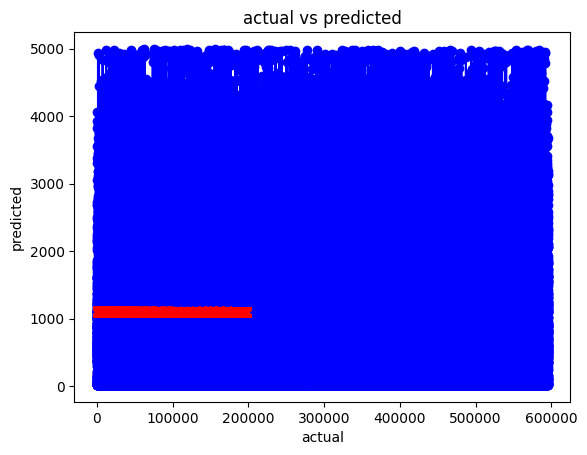

In [62]:
display(y_pred)
import numpy as np
# display(y_test)

import matplotlib.pyplot as plt
colors = np.random.rand(2)
plt.plot(y_test, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='--', color='red')
# plt.plot([min(y_test.values), max(y_test)], [min(y_test.values), max(y_test)], color='red', linewidth=2)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
plt.show()

In [45]:
display(y_test.values)

array([1483.,  439.,  703., ...,  441., 1824., 1526.])